In [17]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import re
from sklearn.model_selection import train_test_split

In [18]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cryptonews.csv')
df

,date,sentiment,source,subject,text,title,url
0,2023-12-19 06:40:41,"{'class': 'negative', 'polarity': -0.1, 'subje...",CryptoNews,altcoin,Grayscale CEO Michael Sonnenshein believes the...,Grayscale CEO Calls for Simultaneous Approval ...,https://cryptonews.comhttps://cryptonews.com/n...
1,2023-12-19 06:03:24,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CryptoNews,blockchain,"In an exclusive interview with CryptoNews, Man...",Indian Government is Actively Collaborating Wi...,https://cryptonews.comhttps://cryptonews.com/n...
2,2023-12-19 05:55:14,"{'class': 'positive', 'polarity': 0.05, 'subje...",CryptoNews,blockchain,According to the Federal Court ruling on Decem...,Judge Approves Settlement: Binance to Pay $1.5...,https://cryptonews.comhttps://cryptonews.com/n...
3,2023-12-19 05:35:26,"{'class': 'positive', 'polarity': 0.5, 'subjec...",CoinTelegraph,blockchain,Some suggest EVM inscriptions are the latest w...,Why a gold rush for inscriptions has broken ha...,https://cointelegraph.com/news/inscriptions-ev...
4,2023-12-19 05:31:08,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CoinTelegraph,ethereum,A decision by bloXroute Labs to start censorin...,‘Concerning precedent’ — bloXroute Labs' MEV r...,https://cointelegraph.com/news/concerning-prec...
...,...,...,...,...,...,...,...
31032,2021-10-27 15:17:00,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CryptoNews,defi,Cream Finance (CREAM) suffered another flash l...,Cream Finance Suffers Another Exploit as Attac...,https://cryptonews.com/news/cream-finance-suff...
31033,2021-10-19 13:39:00,"{'class': 'positive', 'polarity': 0.1, 'subjec...",CryptoNews,blockchain,Banque de France disclosed the results of its ...,French Central Bank's Blockchain Bond Trial Br...,https://cryptonews.com/news/french-central-ban...
31034,2021-10-18 13:58:00,"{'class': 'positive', 'polarity': 0.14, 'subje...",CryptoNews,blockchain,Advancing its project to become \x9caÂ\xa0meta...,"Facebook To Add 10,000 Jobs In EU For Metavers...",https://cryptonews.com/news/facebook-to-add-10...
31035,2021-10-15 00:00:00,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CryptoNews,blockchain,Chinese companies are still topping the blockc...,Tech Crackdown Hasn't Halted Chinese Firms' Bl...,https://cryptonews.com/news/tech-crackdown-has...


In [19]:
# Extract and change the sentiment column according to the criteria
def extract_sentiment_info(sentiment_str):
    try:
        sentiment_dict = {}
        parts = sentiment_str.split(',')
        for part in parts:
            key, value = part.split(':')
            sentiment_dict[key] = value
        return sentiment_dict
    except (ValueError, AttributeError):
        return {'class': None, 'polarity': None, 'subjectivity': None}

df[['class', 'polarity', 'subjectivity']] = df['sentiment'].apply(lambda x: pd.Series(extract_sentiment_info(x)))

df

,date,sentiment,source,subject,text,title,url,class,polarity,subjectivity
0,2023-12-19 06:40:41,"{'class': 'negative', 'polarity': -0.1, 'subje...",CryptoNews,altcoin,Grayscale CEO Michael Sonnenshein believes the...,Grayscale CEO Calls for Simultaneous Approval ...,https://cryptonews.comhttps://cryptonews.com/n...,'negative',-0.1,0.6}
1,2023-12-19 06:03:24,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CryptoNews,blockchain,"In an exclusive interview with CryptoNews, Man...",Indian Government is Actively Collaborating Wi...,https://cryptonews.comhttps://cryptonews.com/n...,'neutral',0.0,0.0}
2,2023-12-19 05:55:14,"{'class': 'positive', 'polarity': 0.05, 'subje...",CryptoNews,blockchain,According to the Federal Court ruling on Decem...,Judge Approves Settlement: Binance to Pay $1.5...,https://cryptonews.comhttps://cryptonews.com/n...,'positive',0.05,0.05}
3,2023-12-19 05:35:26,"{'class': 'positive', 'polarity': 0.5, 'subjec...",CoinTelegraph,blockchain,Some suggest EVM inscriptions are the latest w...,Why a gold rush for inscriptions has broken ha...,https://cointelegraph.com/news/inscriptions-ev...,'positive',0.5,0.9}
4,2023-12-19 05:31:08,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CoinTelegraph,ethereum,A decision by bloXroute Labs to start censorin...,‘Concerning precedent’ — bloXroute Labs' MEV r...,https://cointelegraph.com/news/concerning-prec...,'neutral',0.0,0.0}
...,...,...,...,...,...,...,...,...,...,...
31032,2021-10-27 15:17:00,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CryptoNews,defi,Cream Finance (CREAM) suffered another flash l...,Cream Finance Suffers Another Exploit as Attac...,https://cryptonews.com/news/cream-finance-suff...,'neutral',0.0,0.0}
31033,2021-10-19 13:39:00,"{'class': 'positive', 'polarity': 0.1, 'subjec...",CryptoNews,blockchain,Banque de France disclosed the results of its ...,French Central Bank's Blockchain Bond Trial Br...,https://cryptonews.com/news/french-central-ban...,'positive',0.1,0.4}
31034,2021-10-18 13:58:00,"{'class': 'positive', 'polarity': 0.14, 'subje...",CryptoNews,blockchain,Advancing its project to become \x9caÂ\xa0meta...,"Facebook To Add 10,000 Jobs In EU For Metavers...",https://cryptonews.com/news/facebook-to-add-10...,'positive',0.14,0.45}
31035,2021-10-15 00:00:00,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CryptoNews,blockchain,Chinese companies are still topping the blockc...,Tech Crackdown Hasn't Halted Chinese Firms' Bl...,https://cryptonews.com/news/tech-crackdown-has...,'neutral',0.0,0.0}


In [20]:
# delete sentiment column
df = df.drop('sentiment', axis=1)

In [21]:
# remove the last bracket on subjectivity column
df['subjectivity'] = df['subjectivity'].str.replace('}', '', regex=False)

In [22]:
df

,date,source,subject,text,title,url,class,polarity,subjectivity
0,2023-12-19 06:40:41,CryptoNews,altcoin,Grayscale CEO Michael Sonnenshein believes the...,Grayscale CEO Calls for Simultaneous Approval ...,https://cryptonews.comhttps://cryptonews.com/n...,'negative',-0.1,0.6
1,2023-12-19 06:03:24,CryptoNews,blockchain,"In an exclusive interview with CryptoNews, Man...",Indian Government is Actively Collaborating Wi...,https://cryptonews.comhttps://cryptonews.com/n...,'neutral',0.0,0.0
2,2023-12-19 05:55:14,CryptoNews,blockchain,According to the Federal Court ruling on Decem...,Judge Approves Settlement: Binance to Pay $1.5...,https://cryptonews.comhttps://cryptonews.com/n...,'positive',0.05,0.05
3,2023-12-19 05:35:26,CoinTelegraph,blockchain,Some suggest EVM inscriptions are the latest w...,Why a gold rush for inscriptions has broken ha...,https://cointelegraph.com/news/inscriptions-ev...,'positive',0.5,0.9
4,2023-12-19 05:31:08,CoinTelegraph,ethereum,A decision by bloXroute Labs to start censorin...,‘Concerning precedent’ — bloXroute Labs' MEV r...,https://cointelegraph.com/news/concerning-prec...,'neutral',0.0,0.0
...,...,...,...,...,...,...,...,...,...
31032,2021-10-27 15:17:00,CryptoNews,defi,Cream Finance (CREAM) suffered another flash l...,Cream Finance Suffers Another Exploit as Attac...,https://cryptonews.com/news/cream-finance-suff...,'neutral',0.0,0.0
31033,2021-10-19 13:39:00,CryptoNews,blockchain,Banque de France disclosed the results of its ...,French Central Bank's Blockchain Bond Trial Br...,https://cryptonews.com/news/french-central-ban...,'positive',0.1,0.4
31034,2021-10-18 13:58:00,CryptoNews,blockchain,Advancing its project to become \x9caÂ\xa0meta...,"Facebook To Add 10,000 Jobs In EU For Metavers...",https://cryptonews.com/news/facebook-to-add-10...,'positive',0.14,0.45
31035,2021-10-15 00:00:00,CryptoNews,blockchain,Chinese companies are still topping the blockc...,Tech Crackdown Hasn't Halted Chinese Firms' Bl...,https://cryptonews.com/news/tech-crackdown-has...,'neutral',0.0,0.0


## **Text Preprocessing**

In [29]:
!pip install nltk

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [30]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # 1. Lowercasing
    text = text.lower()

    # 2. Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # 3. Tokenization
    tokens = word_tokenize(text)

    # 4. Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # 5. Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return " ".join(tokens)

In [32]:
import nltk
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize

# Proceed with the preprocessing as before
df['processed_text'] = df['text'].apply(preprocess_text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [33]:
df

,date,source,subject,text,title,url,class,polarity,subjectivity,processed_text
0,2023-12-19 06:40:41,CryptoNews,altcoin,Grayscale CEO Michael Sonnenshein believes the...,Grayscale CEO Calls for Simultaneous Approval ...,https://cryptonews.comhttps://cryptonews.com/n...,'negative',-0.1,0.6,grayscale ceo michael sonnenshein belief sec n...
1,2023-12-19 06:03:24,CryptoNews,blockchain,"In an exclusive interview with CryptoNews, Man...",Indian Government is Actively Collaborating Wi...,https://cryptonews.comhttps://cryptonews.com/n...,'neutral',0.0,0.0,exclusive interview cryptonews manhar garegrat...
2,2023-12-19 05:55:14,CryptoNews,blockchain,According to the Federal Court ruling on Decem...,Judge Approves Settlement: Binance to Pay $1.5...,https://cryptonews.comhttps://cryptonews.com/n...,'positive',0.05,0.05,according federal court ruling december 18 for...
3,2023-12-19 05:35:26,CoinTelegraph,blockchain,Some suggest EVM inscriptions are the latest w...,Why a gold rush for inscriptions has broken ha...,https://cointelegraph.com/news/inscriptions-ev...,'positive',0.5,0.9,suggest evm inscription latest way retail acce...
4,2023-12-19 05:31:08,CoinTelegraph,ethereum,A decision by bloXroute Labs to start censorin...,‘Concerning precedent’ — bloXroute Labs' MEV r...,https://cointelegraph.com/news/concerning-prec...,'neutral',0.0,0.0,decision bloxroute lab start censoring ofacsan...
...,...,...,...,...,...,...,...,...,...,...
31032,2021-10-27 15:17:00,CryptoNews,defi,Cream Finance (CREAM) suffered another flash l...,Cream Finance Suffers Another Exploit as Attac...,https://cryptonews.com/news/cream-finance-suff...,'neutral',0.0,0.0,cream finance cream suffered another flash loa...
31033,2021-10-19 13:39:00,CryptoNews,blockchain,Banque de France disclosed the results of its ...,French Central Bank's Blockchain Bond Trial Br...,https://cryptonews.com/news/french-central-ban...,'positive',0.1,0.4,banque de france disclosed result experimental...
31034,2021-10-18 13:58:00,CryptoNews,blockchain,Advancing its project to become \x9caÂ\xa0meta...,"Facebook To Add 10,000 Jobs In EU For Metavers...",https://cryptonews.com/news/facebook-to-add-10...,'positive',0.14,0.45,advancing project become x9caâxa0metaverseâxa0...
31035,2021-10-15 00:00:00,CryptoNews,blockchain,Chinese companies are still topping the blockc...,Tech Crackdown Hasn't Halted Chinese Firms' Bl...,https://cryptonews.com/news/tech-crackdown-has...,'neutral',0.0,0.0,chinese company still topping blockchain paten...


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the preprocessed text
vectorizer.fit(df['processed_text'])

# Transform the text into TF-IDF features
X = vectorizer.transform(df['processed_text'])

# Get the target variable (sentiment class)
y = df['class']

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

model = LogisticRegression()
nb_model = MultinomialNB()
svm_model = SVC()

In [37]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Train Logistic Regression
model.fit(X_train, y_train)

# Train Naive Bayes
nb_model.fit(X_train, y_train)

# Train SVM
svm_model.fit(X_train, y_train)

SVC()

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate Logistic Regression
y_pred_lr = model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')  # Use 'weighted' for multi-class
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

# Evaluate Naive Bayes
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
# ... (Similar calculations for precision, recall, F1-score for Naive Bayes)

# Evaluate SVM
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
# ... (Similar calculations for precision, recall, F1-score for SVM)

In [39]:
print("Logistic Regression Accuracy:", accuracy_lr)
print("Naive Bayes Accuracy:", accuracy_nb)
print("SVM Accuracy:", accuracy_svm)

Logistic Regression Accuracy: 0.8020296391752577
Naive Bayes Accuracy: 0.5573453608247423
SVM Accuracy: 0.7909149484536082


## **Prediction**

In [40]:
def predict_sentiment(text):
    # 1. Preprocess the text
    processed_text = preprocess_text(text)

    # 2. Extract features using the trained TF-IDF vectorizer
    features = vectorizer.transform([processed_text])  # Note: [processed_text] to make it a list

    # 3. Predict using each model
    lr_prediction = model.predict(features)[0]
    nb_prediction = nb_model.predict(features)[0]
    svm_prediction = svm_model.predict(features)[0]

    # 4. Return predictions
    return {
        "Logistic Regression": lr_prediction,
        "Naive Bayes": nb_prediction,
        "SVM": svm_prediction
    }

In [41]:
text1 = "This is an amazing product!"
text2 = "I'm really disappointed with this service."

predictions1 = predict_sentiment(text1)
predictions2 = predict_sentiment(text2)

print("Predictions for text1:", predictions1)
print("Predictions for text2:", predictions2)

Predictions for text1: {'Logistic Regression': " 'neutral'", 'Naive Bayes': " 'positive'", 'SVM': " 'neutral'"}
Predictions for text2: {'Logistic Regression': " 'neutral'", 'Naive Bayes': " 'positive'", 'SVM': " 'neutral'"}


## **Interpretation**

In [42]:
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]  # Assuming binary classification

feature_importance = pd.DataFrame({'feature': feature_names, 'importance': coefficients})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print(feature_importance.head(10))  # Print top 10 positive features
print(feature_importance.tail(10))  # Print top 10 negative features

             feature  importance
22338            sec    7.147178
18943           past    6.824218
11374           firm    6.703230
4809          behind    6.396503
4677            base    6.166097
9668             due    6.128687
10971         failed    5.881183
19902     previously    4.923826
3945   approximately    4.916965
15353          least    4.908691
           feature  importance
22931  significant   -1.927440
24014       strong   -1.955695
12464         good   -2.092874
15375        legal   -2.165033
10801  experienced   -2.253719
4919          best   -2.500040
19586      popular   -2.642347
16154         many   -2.961154
25230          top   -3.228032
15234       latest   -4.071402


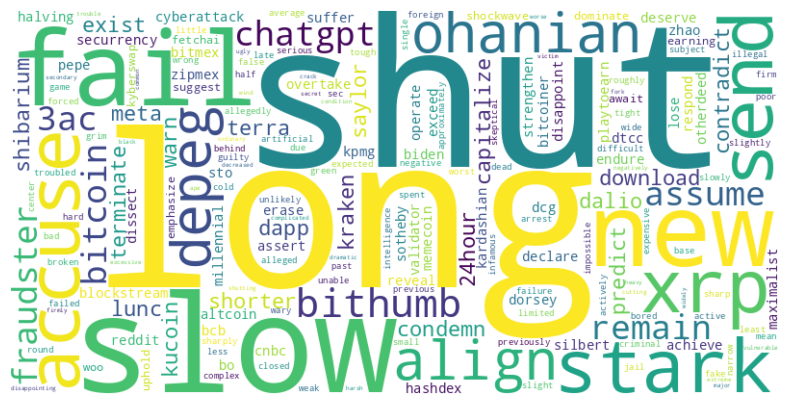

In [43]:
from wordcloud import WordCloud

positive_words = " ".join(feature_importance[feature_importance['importance'] > 0]['feature'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()